# Importamos librerías

In [27]:
import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras

In [28]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.initializers import HeNormal
from keras.regularizers import l1, l2

In [29]:
tf.test.is_gpu_available()

False

# Importamos los datos

In [30]:
path = '../../../Base de datos/Campo 20 puntos'

## Datos de entrenamiento

### Datos

In [31]:
campvectrain = np.load(path + '/campvectrain.npy')

In [32]:
np.shape(campvectrain)

(7000, 2, 20, 20)

### Coeficientes

In [33]:
coefcampvectrain = np.load(path + '/coefcampvectrain.npy')

In [34]:
np.shape(coefcampvectrain)

(7000, 7)

## Datos de prueba

### Datos

In [35]:
campvectest = np.load(path + '/campvectest.npy')

In [36]:
np.shape(campvectest)

(2000, 2, 20, 20)

### Coeficientes

In [37]:
coefcampvectest = np.load(path + '/coefcampvectest.npy')

In [38]:
np.shape(coefcampvectest)

(2000, 7)

## Datos de validación

### Datos

In [39]:
campvecval = np.load(path + '/campvecval.npy')

In [40]:
np.shape(campvecval)

(1000, 2, 20, 20)

### Coeficienes

In [41]:
coefcampvecval = np.load(path + '/coefcampvecval.npy')

In [42]:
np.shape(coefcampvecval)

(1000, 7)

# Unimos coeficientes con los datos

In [43]:
train_dataset = tf.data.Dataset.from_tensor_slices((campvectrain, coefcampvectrain))
test_dataset = tf.data.Dataset.from_tensor_slices((campvectest, coefcampvectest))
val_dataset = tf.data.Dataset.from_tensor_slices((campvecval, coefcampvecval))

In [44]:
train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(2, 20, 20), dtype=tf.float64, name=None), TensorSpec(shape=(7,), dtype=tf.int32, name=None))>

# Mezclar y procesar por lotes los conjuntos de datos

In [45]:
BATCH_SIZE = 10
SHUFFLE_BUFFER_SIZE = 10

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)

# Creación del modelo

In [46]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(2,20,20)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(7)
])

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 batch_normalization_2 (Batc  (None, 800)              3200      
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 20)                16020     
                                                                 
 dense_6 (Dense)             (None, 20)                420       
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 5)                 55        
                                                      

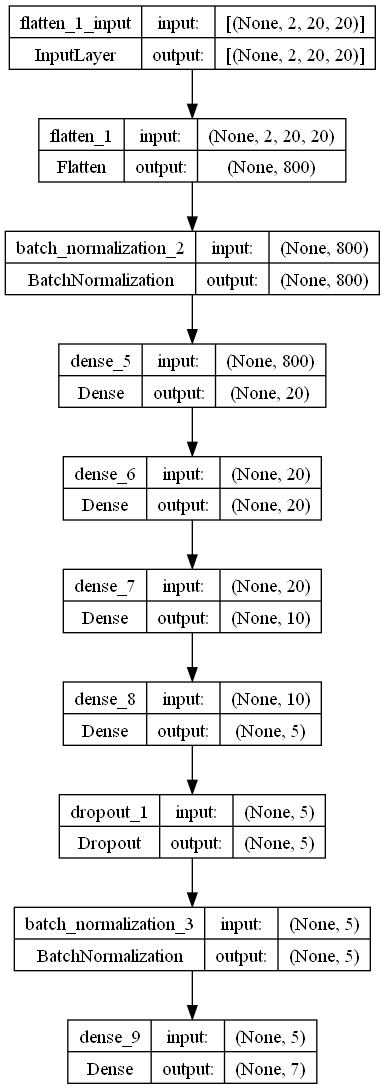

In [48]:
keras.utils.plot_model(model,show_shapes=True)

# Entrenamos el modelo

In [49]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001,clipvalue=100.0)

In [50]:
model.compile(optimizer=optimizer,
              loss= 'mae',
              metrics=['mae'])

In [51]:
def scheduler(epoch, lr):
  if epoch < 400:
    return lr
  else:
    return -1.65e-6*epoch +  0.00166

In [52]:
val_epochs = 1000

early_stop = tf.keras.callbacks.EarlyStopping( monitor = 'val_loss', patience = 1000,verbose = 1, 
                                              restore_best_weights = True)

reduce_lr = tf.keras.callbacks.LearningRateScheduler(scheduler)
history = model.fit(train_dataset, validation_data=val_dataset, epochs= val_epochs, callbacks=[reduce_lr, early_stop])

Epoch 1/1000
700/700 [==============================] - 1s 960us/step - loss: 3.5951 - mae: 3.5951 - val_loss: 2.5052 - val_mae: 2.5052 - lr: 0.0010
Epoch 2/1000
700/700 [==============================] - 1s 876us/step - loss: 2.4095 - mae: 2.4095 - val_loss: 2.2077 - val_mae: 2.2077 - lr: 0.0010
Epoch 3/1000
700/700 [==============================] - 1s 863us/step - loss: 2.3272 - mae: 2.3272 - val_loss: 2.1364 - val_mae: 2.1364 - lr: 0.0010
Epoch 4/1000
700/700 [==============================] - 1s 861us/step - loss: 2.3083 - mae: 2.3083 - val_loss: 2.1167 - val_mae: 2.1167 - lr: 0.0010
Epoch 5/1000
700/700 [==============================] - 1s 854us/step - loss: 2.2791 - mae: 2.2791 - val_loss: 2.1001 - val_mae: 2.1001 - lr: 0.0010
Epoch 6/1000
700/700 [==============================] - 1s 870us/step - loss: 2.2653 - mae: 2.2653 - val_loss: 2.0632 - val_mae: 2.0632 - lr: 0.0010
Epoch 7/1000
700/700 [==============================] - 1s 853us/step - loss: 2.2480 - mae: 2.2480 - val_l

Epoch 56/1000
700/700 [==============================] - 1s 860us/step - loss: 2.2324 - mae: 2.2324 - val_loss: 2.0155 - val_mae: 2.0155 - lr: 0.0010
Epoch 57/1000
700/700 [==============================] - 1s 853us/step - loss: 2.2197 - mae: 2.2197 - val_loss: 2.0088 - val_mae: 2.0088 - lr: 0.0010
Epoch 58/1000
700/700 [==============================] - 1s 855us/step - loss: 2.2207 - mae: 2.2207 - val_loss: 2.0177 - val_mae: 2.0177 - lr: 0.0010
Epoch 59/1000
700/700 [==============================] - 1s 866us/step - loss: 2.2305 - mae: 2.2305 - val_loss: 2.0204 - val_mae: 2.0204 - lr: 0.0010
Epoch 60/1000
700/700 [==============================] - 1s 860us/step - loss: 2.2286 - mae: 2.2286 - val_loss: 2.0431 - val_mae: 2.0431 - lr: 0.0010
Epoch 61/1000
700/700 [==============================] - 1s 852us/step - loss: 2.2186 - mae: 2.2186 - val_loss: 2.0225 - val_mae: 2.0225 - lr: 0.0010
Epoch 62/1000
700/700 [==============================] - 1s 853us/step - loss: 2.2250 - mae: 2.2250 

700/700 [==============================] - 1s 850us/step - loss: 2.2214 - mae: 2.2214 - val_loss: 2.0139 - val_mae: 2.0139 - lr: 0.0010
Epoch 111/1000
700/700 [==============================] - 1s 840us/step - loss: 2.2278 - mae: 2.2278 - val_loss: 2.0247 - val_mae: 2.0247 - lr: 0.0010
Epoch 112/1000
700/700 [==============================] - 1s 846us/step - loss: 2.2259 - mae: 2.2259 - val_loss: 2.0133 - val_mae: 2.0133 - lr: 0.0010
Epoch 113/1000
700/700 [==============================] - 1s 842us/step - loss: 2.2211 - mae: 2.2211 - val_loss: 2.0252 - val_mae: 2.0252 - lr: 0.0010
Epoch 114/1000
700/700 [==============================] - 1s 842us/step - loss: 2.2178 - mae: 2.2178 - val_loss: 2.0190 - val_mae: 2.0190 - lr: 0.0010
Epoch 115/1000
700/700 [==============================] - 1s 851us/step - loss: 2.2158 - mae: 2.2158 - val_loss: 2.0282 - val_mae: 2.0282 - lr: 0.0010
Epoch 116/1000
700/700 [==============================] - 1s 845us/step - loss: 2.2264 - mae: 2.2264 - val_lo

700/700 [==============================] - 1s 854us/step - loss: 2.2207 - mae: 2.2207 - val_loss: 2.0189 - val_mae: 2.0189 - lr: 0.0010
Epoch 165/1000
700/700 [==============================] - 1s 866us/step - loss: 2.2274 - mae: 2.2274 - val_loss: 2.0103 - val_mae: 2.0103 - lr: 0.0010
Epoch 166/1000
700/700 [==============================] - 1s 852us/step - loss: 2.2227 - mae: 2.2227 - val_loss: 2.0254 - val_mae: 2.0254 - lr: 0.0010
Epoch 167/1000
700/700 [==============================] - 1s 864us/step - loss: 2.2192 - mae: 2.2192 - val_loss: 2.0188 - val_mae: 2.0188 - lr: 0.0010
Epoch 168/1000
700/700 [==============================] - 1s 875us/step - loss: 2.2256 - mae: 2.2256 - val_loss: 2.0161 - val_mae: 2.0161 - lr: 0.0010
Epoch 169/1000
700/700 [==============================] - 1s 872us/step - loss: 2.2180 - mae: 2.2180 - val_loss: 2.0339 - val_mae: 2.0339 - lr: 0.0010
Epoch 170/1000
700/700 [==============================] - 1s 864us/step - loss: 2.2229 - mae: 2.2229 - val_lo

700/700 [==============================] - 1s 912us/step - loss: 2.2338 - mae: 2.2338 - val_loss: 2.0171 - val_mae: 2.0171 - lr: 0.0010
Epoch 219/1000
700/700 [==============================] - 1s 864us/step - loss: 2.2195 - mae: 2.2195 - val_loss: 2.0101 - val_mae: 2.0101 - lr: 0.0010
Epoch 220/1000
700/700 [==============================] - 1s 861us/step - loss: 2.2102 - mae: 2.2102 - val_loss: 2.0077 - val_mae: 2.0077 - lr: 0.0010
Epoch 221/1000
700/700 [==============================] - 1s 840us/step - loss: 2.2164 - mae: 2.2164 - val_loss: 2.0266 - val_mae: 2.0266 - lr: 0.0010
Epoch 222/1000
700/700 [==============================] - 1s 877us/step - loss: 2.2180 - mae: 2.2180 - val_loss: 2.0215 - val_mae: 2.0215 - lr: 0.0010
Epoch 223/1000
700/700 [==============================] - 1s 834us/step - loss: 2.2241 - mae: 2.2241 - val_loss: 2.0208 - val_mae: 2.0208 - lr: 0.0010
Epoch 224/1000
700/700 [==============================] - 1s 857us/step - loss: 2.2290 - mae: 2.2290 - val_lo

700/700 [==============================] - 1s 874us/step - loss: 2.2215 - mae: 2.2215 - val_loss: 2.0179 - val_mae: 2.0179 - lr: 0.0010
Epoch 273/1000
700/700 [==============================] - 1s 892us/step - loss: 2.2141 - mae: 2.2141 - val_loss: 2.0106 - val_mae: 2.0106 - lr: 0.0010
Epoch 274/1000
700/700 [==============================] - 1s 855us/step - loss: 2.2200 - mae: 2.2200 - val_loss: 2.0189 - val_mae: 2.0189 - lr: 0.0010
Epoch 275/1000
700/700 [==============================] - 1s 904us/step - loss: 2.2223 - mae: 2.2223 - val_loss: 2.0332 - val_mae: 2.0332 - lr: 0.0010
Epoch 276/1000
700/700 [==============================] - 1s 911us/step - loss: 2.2191 - mae: 2.2191 - val_loss: 2.0219 - val_mae: 2.0219 - lr: 0.0010
Epoch 277/1000
700/700 [==============================] - 1s 876us/step - loss: 2.2219 - mae: 2.2219 - val_loss: 2.0138 - val_mae: 2.0138 - lr: 0.0010
Epoch 278/1000
700/700 [==============================] - 1s 887us/step - loss: 2.2212 - mae: 2.2212 - val_lo

700/700 [==============================] - 1s 922us/step - loss: 2.2248 - mae: 2.2248 - val_loss: 2.0081 - val_mae: 2.0081 - lr: 0.0010
Epoch 327/1000
700/700 [==============================] - 1s 894us/step - loss: 2.2258 - mae: 2.2258 - val_loss: 2.0238 - val_mae: 2.0238 - lr: 0.0010
Epoch 328/1000
700/700 [==============================] - 1s 906us/step - loss: 2.2235 - mae: 2.2235 - val_loss: 2.0242 - val_mae: 2.0242 - lr: 0.0010
Epoch 329/1000
700/700 [==============================] - 1s 873us/step - loss: 2.2212 - mae: 2.2212 - val_loss: 2.0190 - val_mae: 2.0190 - lr: 0.0010
Epoch 330/1000
700/700 [==============================] - 1s 878us/step - loss: 2.2297 - mae: 2.2297 - val_loss: 2.0206 - val_mae: 2.0206 - lr: 0.0010
Epoch 331/1000
700/700 [==============================] - 1s 868us/step - loss: 2.2300 - mae: 2.2300 - val_loss: 2.0197 - val_mae: 2.0197 - lr: 0.0010
Epoch 332/1000
700/700 [==============================] - 1s 852us/step - loss: 2.2167 - mae: 2.2167 - val_lo

700/700 [==============================] - 1s 873us/step - loss: 2.2254 - mae: 2.2254 - val_loss: 2.0269 - val_mae: 2.0269 - lr: 0.0010
Epoch 381/1000
700/700 [==============================] - 1s 953us/step - loss: 2.2135 - mae: 2.2135 - val_loss: 2.0194 - val_mae: 2.0194 - lr: 0.0010
Epoch 382/1000
700/700 [==============================] - 1s 904us/step - loss: 2.2275 - mae: 2.2275 - val_loss: 2.0120 - val_mae: 2.0120 - lr: 0.0010
Epoch 383/1000
700/700 [==============================] - 1s 894us/step - loss: 2.2224 - mae: 2.2224 - val_loss: 2.0167 - val_mae: 2.0167 - lr: 0.0010
Epoch 384/1000
700/700 [==============================] - 1s 894us/step - loss: 2.2195 - mae: 2.2195 - val_loss: 2.0209 - val_mae: 2.0209 - lr: 0.0010
Epoch 385/1000
700/700 [==============================] - 1s 928us/step - loss: 2.2264 - mae: 2.2264 - val_loss: 2.0201 - val_mae: 2.0201 - lr: 0.0010
Epoch 386/1000
700/700 [==============================] - 1s 889us/step - loss: 2.2191 - mae: 2.2191 - val_lo

700/700 [==============================] - 1s 867us/step - loss: 2.2269 - mae: 2.2269 - val_loss: 2.0146 - val_mae: 2.0146 - lr: 9.4720e-04
Epoch 434/1000
700/700 [==============================] - 1s 851us/step - loss: 2.2151 - mae: 2.2151 - val_loss: 2.0293 - val_mae: 2.0293 - lr: 9.4555e-04
Epoch 435/1000
700/700 [==============================] - 1s 848us/step - loss: 2.2242 - mae: 2.2242 - val_loss: 2.0257 - val_mae: 2.0257 - lr: 9.4390e-04
Epoch 436/1000
700/700 [==============================] - 1s 843us/step - loss: 2.2236 - mae: 2.2236 - val_loss: 2.0195 - val_mae: 2.0195 - lr: 9.4225e-04
Epoch 437/1000
700/700 [==============================] - 1s 847us/step - loss: 2.2180 - mae: 2.2180 - val_loss: 2.0264 - val_mae: 2.0264 - lr: 9.4060e-04
Epoch 438/1000
700/700 [==============================] - 1s 856us/step - loss: 2.2254 - mae: 2.2254 - val_loss: 2.0174 - val_mae: 2.0174 - lr: 9.3895e-04
Epoch 439/1000
700/700 [==============================] - 1s 841us/step - loss: 2.216

Epoch 486/1000
700/700 [==============================] - 1s 878us/step - loss: 2.2223 - mae: 2.2223 - val_loss: 2.0160 - val_mae: 2.0160 - lr: 8.5975e-04
Epoch 487/1000
700/700 [==============================] - 1s 856us/step - loss: 2.2194 - mae: 2.2194 - val_loss: 2.0250 - val_mae: 2.0250 - lr: 8.5810e-04
Epoch 488/1000
700/700 [==============================] - 1s 855us/step - loss: 2.2208 - mae: 2.2208 - val_loss: 2.0283 - val_mae: 2.0283 - lr: 8.5645e-04
Epoch 489/1000
700/700 [==============================] - 1s 879us/step - loss: 2.2277 - mae: 2.2277 - val_loss: 2.0142 - val_mae: 2.0142 - lr: 8.5480e-04
Epoch 490/1000
700/700 [==============================] - 1s 926us/step - loss: 2.2239 - mae: 2.2239 - val_loss: 2.0226 - val_mae: 2.0226 - lr: 8.5315e-04
Epoch 491/1000
700/700 [==============================] - 1s 901us/step - loss: 2.2120 - mae: 2.2120 - val_loss: 2.0175 - val_mae: 2.0175 - lr: 8.5150e-04
Epoch 492/1000
700/700 [==============================] - 1s 919us/ste

Epoch 539/1000
700/700 [==============================] - 1s 924us/step - loss: 2.2234 - mae: 2.2234 - val_loss: 2.0154 - val_mae: 2.0154 - lr: 7.7230e-04
Epoch 540/1000
700/700 [==============================] - 1s 919us/step - loss: 2.2176 - mae: 2.2176 - val_loss: 2.0108 - val_mae: 2.0108 - lr: 7.7065e-04
Epoch 541/1000
700/700 [==============================] - 1s 892us/step - loss: 2.2180 - mae: 2.2180 - val_loss: 2.0170 - val_mae: 2.0170 - lr: 7.6900e-04
Epoch 542/1000
700/700 [==============================] - 1s 873us/step - loss: 2.2178 - mae: 2.2178 - val_loss: 2.0251 - val_mae: 2.0251 - lr: 7.6735e-04
Epoch 543/1000
700/700 [==============================] - 1s 924us/step - loss: 2.2161 - mae: 2.2161 - val_loss: 2.0141 - val_mae: 2.0141 - lr: 7.6570e-04
Epoch 544/1000
700/700 [==============================] - 1s 891us/step - loss: 2.2221 - mae: 2.2221 - val_loss: 2.0211 - val_mae: 2.0211 - lr: 7.6405e-04
Epoch 545/1000
700/700 [==============================] - 1s 885us/ste

Epoch 592/1000
700/700 [==============================] - 1s 934us/step - loss: 2.2200 - mae: 2.2200 - val_loss: 2.0148 - val_mae: 2.0148 - lr: 6.8485e-04
Epoch 593/1000
700/700 [==============================] - 1s 935us/step - loss: 2.2195 - mae: 2.2195 - val_loss: 2.0118 - val_mae: 2.0118 - lr: 6.8320e-04
Epoch 594/1000
700/700 [==============================] - 1s 922us/step - loss: 2.2257 - mae: 2.2257 - val_loss: 2.0267 - val_mae: 2.0267 - lr: 6.8155e-04
Epoch 595/1000
700/700 [==============================] - 1s 956us/step - loss: 2.2256 - mae: 2.2256 - val_loss: 2.0199 - val_mae: 2.0199 - lr: 6.7990e-04
Epoch 596/1000
700/700 [==============================] - 1s 907us/step - loss: 2.2191 - mae: 2.2191 - val_loss: 2.0127 - val_mae: 2.0127 - lr: 6.7825e-04
Epoch 597/1000
700/700 [==============================] - 1s 902us/step - loss: 2.2157 - mae: 2.2157 - val_loss: 2.0092 - val_mae: 2.0092 - lr: 6.7660e-04
Epoch 598/1000
700/700 [==============================] - 1s 923us/ste

Epoch 645/1000
700/700 [==============================] - 1s 944us/step - loss: 2.2265 - mae: 2.2265 - val_loss: 2.0235 - val_mae: 2.0235 - lr: 5.9740e-04
Epoch 646/1000
700/700 [==============================] - 1s 886us/step - loss: 2.2146 - mae: 2.2146 - val_loss: 2.0270 - val_mae: 2.0270 - lr: 5.9575e-04
Epoch 647/1000
700/700 [==============================] - 1s 889us/step - loss: 2.2239 - mae: 2.2239 - val_loss: 2.0137 - val_mae: 2.0137 - lr: 5.9410e-04
Epoch 648/1000
700/700 [==============================] - 1s 905us/step - loss: 2.2218 - mae: 2.2218 - val_loss: 2.0237 - val_mae: 2.0237 - lr: 5.9245e-04
Epoch 649/1000
700/700 [==============================] - 1s 910us/step - loss: 2.2199 - mae: 2.2199 - val_loss: 2.0193 - val_mae: 2.0193 - lr: 5.9080e-04
Epoch 650/1000
700/700 [==============================] - 1s 912us/step - loss: 2.2214 - mae: 2.2214 - val_loss: 2.0185 - val_mae: 2.0185 - lr: 5.8915e-04
Epoch 651/1000
700/700 [==============================] - 1s 884us/ste

Epoch 698/1000
700/700 [==============================] - 1s 883us/step - loss: 2.2225 - mae: 2.2225 - val_loss: 2.0213 - val_mae: 2.0213 - lr: 5.0995e-04
Epoch 699/1000
700/700 [==============================] - 1s 884us/step - loss: 2.2191 - mae: 2.2191 - val_loss: 2.0151 - val_mae: 2.0151 - lr: 5.0830e-04
Epoch 700/1000
700/700 [==============================] - 1s 890us/step - loss: 2.2139 - mae: 2.2139 - val_loss: 2.0164 - val_mae: 2.0164 - lr: 5.0665e-04
Epoch 701/1000
700/700 [==============================] - 1s 875us/step - loss: 2.2274 - mae: 2.2274 - val_loss: 2.0243 - val_mae: 2.0243 - lr: 5.0500e-04
Epoch 702/1000
700/700 [==============================] - 1s 885us/step - loss: 2.2190 - mae: 2.2190 - val_loss: 2.0179 - val_mae: 2.0179 - lr: 5.0335e-04
Epoch 703/1000
700/700 [==============================] - 1s 883us/step - loss: 2.2205 - mae: 2.2205 - val_loss: 2.0253 - val_mae: 2.0253 - lr: 5.0170e-04
Epoch 704/1000
700/700 [==============================] - 1s 973us/ste

Epoch 751/1000
700/700 [==============================] - 1s 912us/step - loss: 2.2231 - mae: 2.2231 - val_loss: 2.0167 - val_mae: 2.0167 - lr: 4.2250e-04
Epoch 752/1000
700/700 [==============================] - 1s 913us/step - loss: 2.2292 - mae: 2.2292 - val_loss: 2.0194 - val_mae: 2.0194 - lr: 4.2085e-04
Epoch 753/1000
700/700 [==============================] - 1s 879us/step - loss: 2.2200 - mae: 2.2200 - val_loss: 2.0294 - val_mae: 2.0294 - lr: 4.1920e-04
Epoch 754/1000
700/700 [==============================] - 1s 898us/step - loss: 2.2203 - mae: 2.2203 - val_loss: 2.0264 - val_mae: 2.0264 - lr: 4.1755e-04
Epoch 755/1000
700/700 [==============================] - 1s 918us/step - loss: 2.2211 - mae: 2.2211 - val_loss: 2.0220 - val_mae: 2.0220 - lr: 4.1590e-04
Epoch 756/1000
700/700 [==============================] - 1s 931us/step - loss: 2.2220 - mae: 2.2220 - val_loss: 2.0188 - val_mae: 2.0188 - lr: 4.1425e-04
Epoch 757/1000
700/700 [==============================] - 1s 943us/ste

Epoch 804/1000
700/700 [==============================] - 1s 920us/step - loss: 2.2225 - mae: 2.2225 - val_loss: 2.0220 - val_mae: 2.0220 - lr: 3.3505e-04
Epoch 805/1000
700/700 [==============================] - 1s 915us/step - loss: 2.2184 - mae: 2.2184 - val_loss: 2.0219 - val_mae: 2.0219 - lr: 3.3340e-04
Epoch 806/1000
700/700 [==============================] - 1s 952us/step - loss: 2.2298 - mae: 2.2298 - val_loss: 2.0084 - val_mae: 2.0084 - lr: 3.3175e-04
Epoch 807/1000
700/700 [==============================] - 1s 941us/step - loss: 2.2227 - mae: 2.2227 - val_loss: 2.0233 - val_mae: 2.0233 - lr: 3.3010e-04
Epoch 808/1000
700/700 [==============================] - 1s 950us/step - loss: 2.2092 - mae: 2.2092 - val_loss: 2.0175 - val_mae: 2.0175 - lr: 3.2845e-04
Epoch 809/1000
700/700 [==============================] - 1s 897us/step - loss: 2.2311 - mae: 2.2311 - val_loss: 2.0155 - val_mae: 2.0155 - lr: 3.2680e-04
Epoch 810/1000
700/700 [==============================] - 1s 918us/ste

Epoch 857/1000
700/700 [==============================] - 1s 937us/step - loss: 2.2214 - mae: 2.2214 - val_loss: 2.0236 - val_mae: 2.0236 - lr: 2.4760e-04
Epoch 858/1000
700/700 [==============================] - 1s 917us/step - loss: 2.2174 - mae: 2.2174 - val_loss: 2.0155 - val_mae: 2.0155 - lr: 2.4595e-04
Epoch 859/1000
700/700 [==============================] - 1s 884us/step - loss: 2.2116 - mae: 2.2116 - val_loss: 2.0175 - val_mae: 2.0175 - lr: 2.4430e-04
Epoch 860/1000
700/700 [==============================] - 1s 932us/step - loss: 2.2267 - mae: 2.2267 - val_loss: 2.0194 - val_mae: 2.0194 - lr: 2.4265e-04
Epoch 861/1000
700/700 [==============================] - 1s 898us/step - loss: 2.2238 - mae: 2.2238 - val_loss: 2.0276 - val_mae: 2.0276 - lr: 2.4100e-04
Epoch 862/1000
700/700 [==============================] - 1s 952us/step - loss: 2.2161 - mae: 2.2161 - val_loss: 2.0187 - val_mae: 2.0187 - lr: 2.3935e-04
Epoch 863/1000
700/700 [==============================] - 1s 936us/ste

Epoch 910/1000
700/700 [==============================] - 1s 917us/step - loss: 2.2185 - mae: 2.2185 - val_loss: 2.0191 - val_mae: 2.0191 - lr: 1.6015e-04
Epoch 911/1000
700/700 [==============================] - 1s 932us/step - loss: 2.2234 - mae: 2.2234 - val_loss: 2.0178 - val_mae: 2.0178 - lr: 1.5850e-04
Epoch 912/1000
700/700 [==============================] - 1s 912us/step - loss: 2.2244 - mae: 2.2244 - val_loss: 2.0251 - val_mae: 2.0251 - lr: 1.5685e-04
Epoch 913/1000
700/700 [==============================] - 1s 879us/step - loss: 2.2286 - mae: 2.2286 - val_loss: 2.0175 - val_mae: 2.0175 - lr: 1.5520e-04
Epoch 914/1000
700/700 [==============================] - 1s 877us/step - loss: 2.2143 - mae: 2.2143 - val_loss: 2.0203 - val_mae: 2.0203 - lr: 1.5355e-04
Epoch 915/1000
700/700 [==============================] - 1s 954us/step - loss: 2.2186 - mae: 2.2186 - val_loss: 2.0177 - val_mae: 2.0177 - lr: 1.5190e-04
Epoch 916/1000
700/700 [==============================] - 1s 914us/ste

Epoch 963/1000
700/700 [==============================] - 1s 878us/step - loss: 2.2257 - mae: 2.2257 - val_loss: 2.0180 - val_mae: 2.0180 - lr: 7.2700e-05
Epoch 964/1000
700/700 [==============================] - 1s 886us/step - loss: 2.2154 - mae: 2.2154 - val_loss: 2.0157 - val_mae: 2.0157 - lr: 7.1050e-05
Epoch 965/1000
700/700 [==============================] - 1s 896us/step - loss: 2.2206 - mae: 2.2206 - val_loss: 2.0137 - val_mae: 2.0137 - lr: 6.9400e-05
Epoch 966/1000
700/700 [==============================] - 1s 888us/step - loss: 2.2288 - mae: 2.2288 - val_loss: 2.0134 - val_mae: 2.0134 - lr: 6.7750e-05
Epoch 967/1000
700/700 [==============================] - 1s 883us/step - loss: 2.2154 - mae: 2.2154 - val_loss: 2.0245 - val_mae: 2.0245 - lr: 6.6100e-05
Epoch 968/1000
700/700 [==============================] - 1s 890us/step - loss: 2.2204 - mae: 2.2204 - val_loss: 2.0236 - val_mae: 2.0236 - lr: 6.4450e-05
Epoch 969/1000
700/700 [==============================] - 1s 883us/ste

# Analizamos accuracy y loss

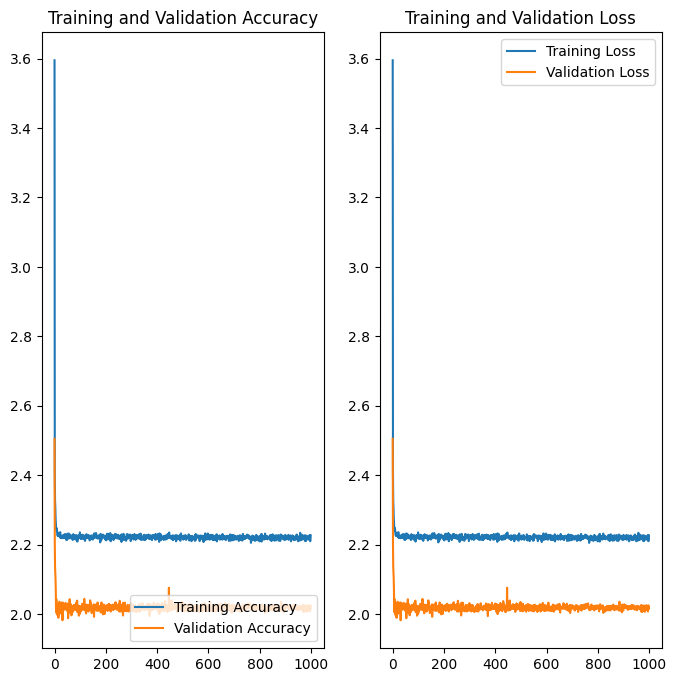

In [53]:
acc = history.history['mae']
val_acc = history.history['val_mae']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(val_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Guardamos los datos Accuracy y Loss

In [54]:
df = pd.DataFrame.from_dict(history.history)
df.to_csv('../../../Gráficas finales/History 20,50/historycampvec20.csv', index=False)

# Guardamos el modelo

In [55]:
path_to_save = '../../../Modelos/Modelos 20,50/'

In [56]:
model.save(path_to_save + '/campovectorial20.h5')

# Importamos el modelo

In [57]:
new_model = keras.models.load_model('../../../Modelos/Modelos 20,50/campovectorial20.h5')

# Probamos el modelo con datos nuevos

## Creamos nuevos datos

In [93]:
import random
from scipy.integrate import solve_ivp

campvec = []
coef = []
contador = 0
for i in range(0, 1):
    # constantes
    a1 = random.randint(0, 10)
    a2 = random.randint(0, 10)
    b1 = random.randint(0, 10)
    b2 = random.randint(0, 10)
    d1 = random.randint(0, 10)
    d2 = random.randint(0, 10)
    n = random.randint(0, 5)

    coef1 = [a1, a2, b1, b2, d1, d2, n]
    coef.append(coef1)

    def f(t, y):

        # asignar a cada ODE a un elemento de vector
        X = y[0]
        Y = y[1]

        # definimos cada ODE
        # dX_dt=a1/(1+Y**n)-d1*X+b1
        # dY_dt=a2/(1+X**n)-d2*Y+b2
        dX_dt = a1/(1+Y**n)-d1*X+b1
        dY_dt = a2/(1+X**n)-d2*Y+b1

        return [dX_dt, dY_dt]

    x_range_neg = 0
    x_range_pos = 10
    y_range_neg = 0
    y_range_pos = 10

    y1 = np.linspace(x_range_neg, x_range_pos, 20)
    y2 = np.linspace(y_range_neg, y_range_pos, 20)

    Y1, Y2 = np.meshgrid(y1, y2)
    
    t1 = 0

    u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

    NI, NJ = Y1.shape

    u1, v1 = f(t1, [Y1, Y2])
    u, v = f(t1, [Y1, Y2])
    M = (np.hypot(u, v))
    u /= M
    v /= M

    campvecci = np.append([u1], [v1], axis=0)

    campvec = campvecci
    print('--------------------------------------------')
    print(coef1)
    contador = contador+1
    print(contador)
    
campvec = np.array(campvec)
coef = np.array(coef)


--------------------------------------------
[4, 5, 5, 8, 8, 9, 3]
1


In [94]:
campvecnone = campvec[None, :]

## Predecimos con los datos nuevos

In [95]:
new_predictions = new_model.predict(campvecnone)
new_predictions = np.round(new_predictions)
new_predictions = np.clip(new_predictions, 0, None)
print(new_predictions)

1/1 [==============================] - 0s 12ms/step
[[5. 5. 5. 5. 8. 8. 3.]]


## Encontramos puntos de equilibrio datos reales

In [96]:
from scipy.optimize import fsolve
# Sistema de ecuaciones
def system(Y):
    X, Y = Y
    dX_dt = a1/(1+Y**n)-d1*X+b1
    dY_dt = a2/(1+X**n)-d2*Y+b1
    return [dX_dt, dY_dt]

# Adivinanza inicial para X, Y
initial_guess = [0, 0]

# Encontrar los puntos de equilibrio
primer_cuadrante_reales = fsolve(system, initial_guess)
primer_cuadrante_reales = tuple(primer_cuadrante_reales)


print(primer_cuadrante_reales)

(0.9289997808656575, 0.8638952685895438)


## Graficamos con los coeficientes reales

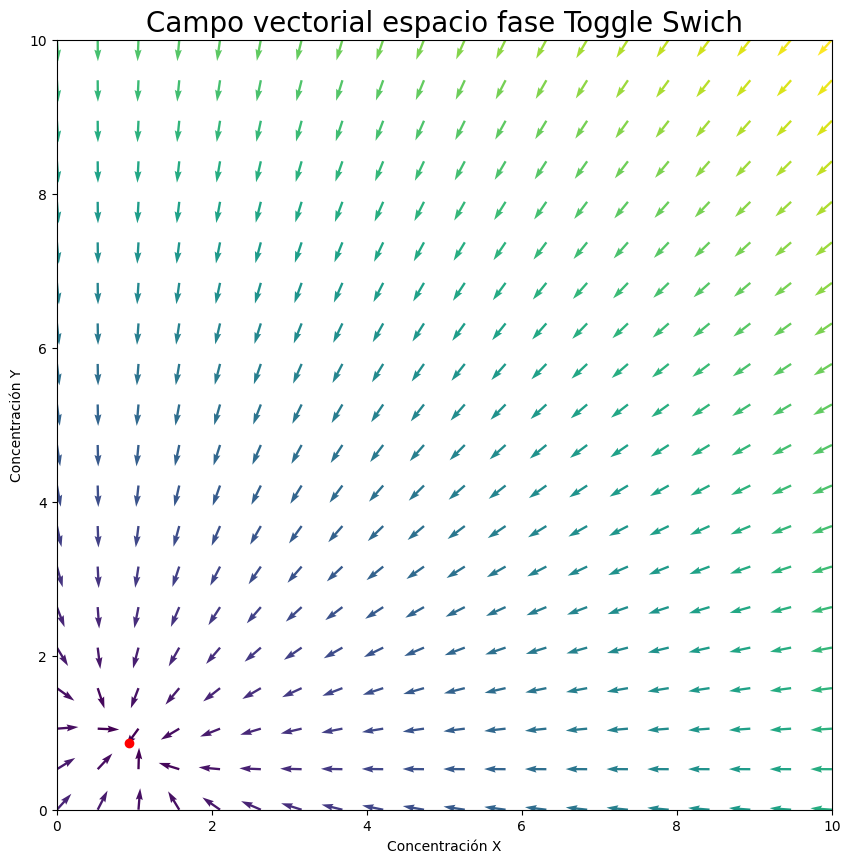

In [97]:
import matplotlib.pyplot as plt

x_values = primer_cuadrante_reales[0]
y_values =primer_cuadrante_reales[1]

y1 = np.linspace(0, 10, 20)
y2 = np.linspace(0, 10, 20)
Y1, Y2 = np.meshgrid(y1, y2)
t1 = 0
u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)
NI, NJ = Y1.shape        
u,v = np.array(campvec)[0,:,:], np.array(campvec)[1,:,:]
M = (np.hypot(u,v))
u /= M
v /= M

plt.figure(figsize=(10,10))
Q = plt.quiver(Y1, Y2, u, v, M, angles='xy')
plt.title('Campo vectorial espacio fase Toggle Swich', fontsize=20)
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.scatter(x_values, y_values, color='red')  # Puedes cambiar el color como prefieras
plt.xlabel('Concentración X')
plt.ylabel('Concentración Y')
plt.show()

## Encontramos puntos de equilibro datos predecidos

In [98]:
a1pred = new_predictions[0,0]
a2pred = new_predictions[0,1]
b1pred = new_predictions[0,2]
b2pred = new_predictions[0,3]
d1pred = new_predictions[0,4]
d2pred = new_predictions[0,5]
npred = new_predictions[0,6]

def systempred(Ypred):
    Xpred, Ypred = Ypred
    dXpred_dt = a1pred/(1+Ypred**npred)-d1pred*Xpred+b1pred
    dYpred_dt = a2pred/(1+Xpred**npred)-d2pred*Ypred+b1pred
    return [dXpred_dt, dYpred_dt]

# Adivinanza inicial para X, Y
initial_guesspred = [0, 0]

# Encontrar los puntos de equilibrio
primer_cuadrante_predecidos = fsolve(systempred, initial_guesspred)
primer_cuadrante_predecidos = tuple(primer_cuadrante_predecidos)


print(primer_cuadrante_predecidos)

(0.9577210889245823, 0.9577210889245823)


## Graficamos con los coeficientes predecidos

Text(0, 0.5, 'Concentración Y')

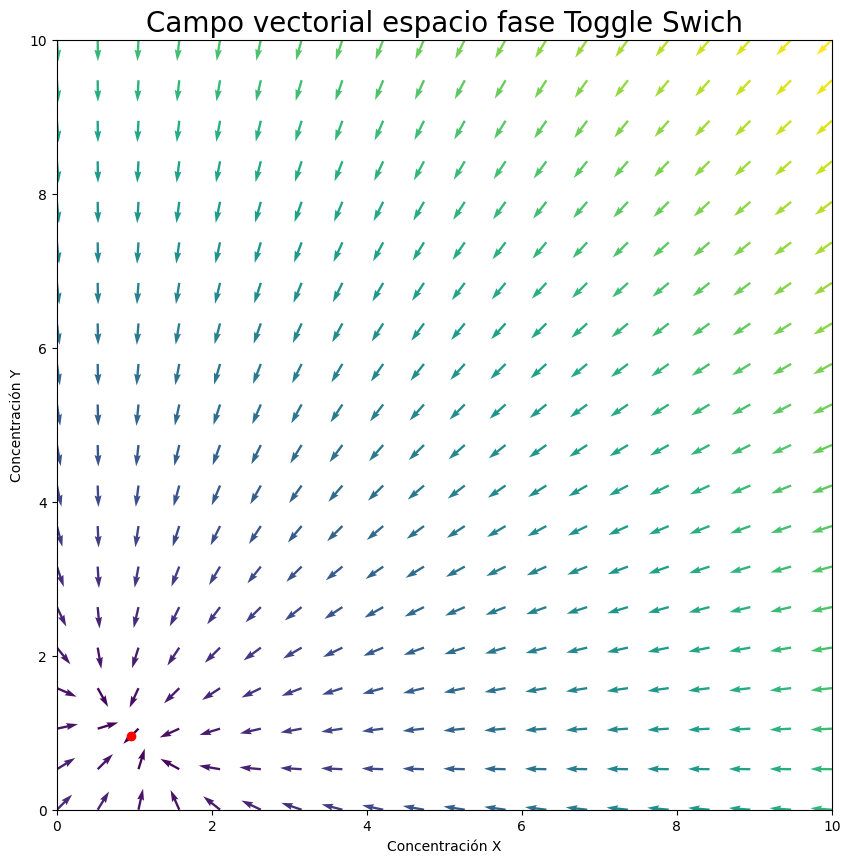

In [99]:
import matplotlib.pyplot as plt

def f(t, y):

    # asignar a cada ODE a un elemento de vector
    X = y[0]
    Y = y[1]

    # definimos cada ODE
    dX_dt = a1pred/(1+Y**npred)-d1pred*X+b1pred
    dY_dt = a2pred/(1+X**npred)-d2pred*Y+b1pred

    return [dX_dt, dY_dt]

x_range_neg = 0
x_range_pos = 10
y_range_neg = 0
y_range_pos = 10

y1pred = np.linspace(x_range_neg, x_range_pos, 20)
y2pred = np.linspace(y_range_neg, y_range_pos, 20)

Y1pred, Y2pred = np.meshgrid(y1pred, y2pred)
    
t1 = 0

upred, vpred = np.zeros(Y1pred.shape), np.zeros(Y2pred.shape)

NI, NJ = Y1.shape

u1pred, v1pred = f(t1, [Y1, Y2])
upred, vpred = f(t1, [Y1, Y2])
Mpred = (np.hypot(upred, vpred))
upred /= Mpred
vpred /= Mpred


x_valuespred = primer_cuadrante_predecidos[0]
y_valuespred =primer_cuadrante_predecidos[1]
plt.figure(figsize=(10, 10))
Q = plt.quiver(Y1, Y2, upred, vpred, Mpred, angles='xy')
plt.title('Campo vectorial espacio fase Toggle Swich', fontsize=20)
plt.xlim([x_range_neg, x_range_pos])
plt.ylim([y_range_neg, y_range_pos])
plt.scatter(x_valuespred, y_valuespred, color='red')  # Puedes cambiar el color como prefieras
plt.xlabel('Concentración X')
plt.ylabel('Concentración Y')

## Graficamos ambos

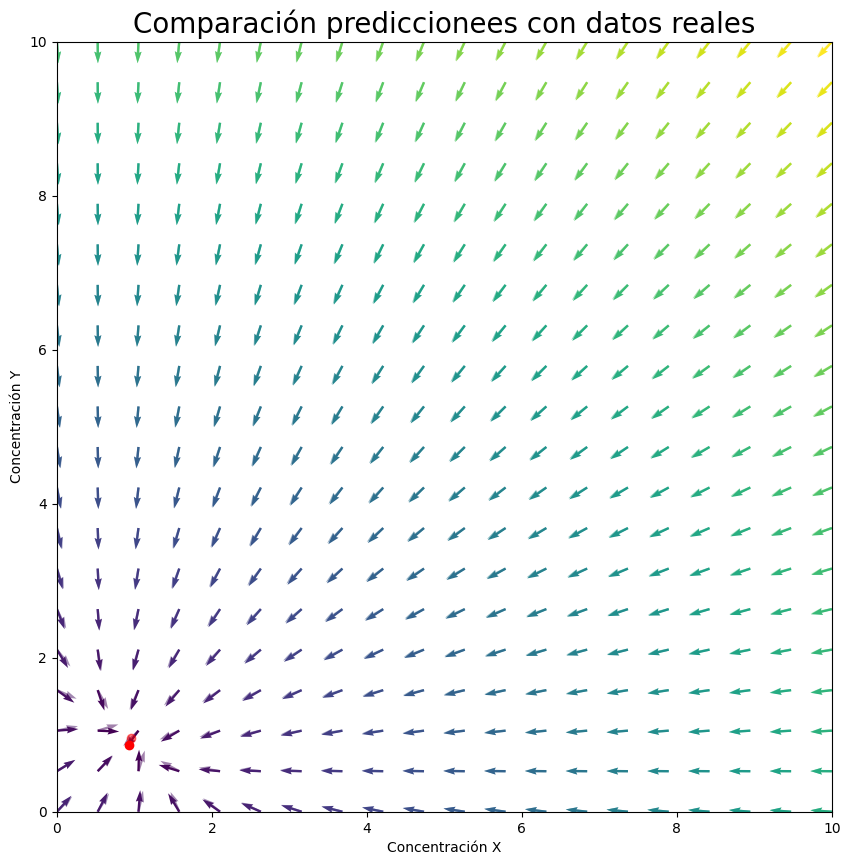

In [101]:
fig, ax = plt.subplots(figsize=(10, 10))

# Primero graficamos la predicción, que debería ser más clara (alpha < 1)
Q = ax.quiver(Y1, Y2, upred, vpred, Mpred, angles='xy', alpha=0.5)

# Luego, graficamos los datos originales, que serán más oscuros (alpha = 1)
Q1 = ax.quiver(Y1, Y2, u, v, M, angles='xy', alpha=1)

ax.scatter(x_valuespred, y_valuespred, color='red', alpha = 0.5)
ax.scatter(x_values, y_values, color='red', alpha = 1)
ax.set_title('Comparación prediccionees con datos reales', fontsize=20)
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_xlabel('Concentración X')
ax.set_ylabel('Concentración Y')

plt.show()

## Graficamos las diferencias

59.98253644664984


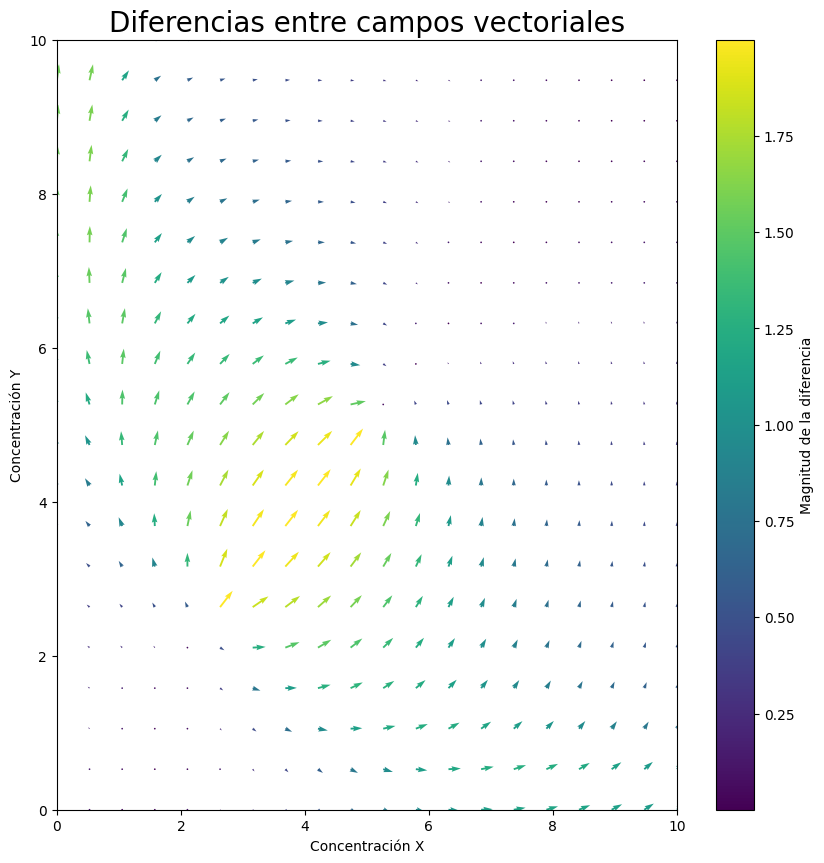

In [84]:
fig, ax = plt.subplots(figsize=(10, 10))

# Calculamos las diferencias
u_diff = u - upred
v_diff = v - vpred

# Ahora calculamos la magnitud
#M_diff = np.hypot(u_diff2, v_diff2)
M_diff = np.hypot(u_diff, v_diff)

#Calcula la magnitud de los vectores
magnitudes = np.sqrt(u_diff**2 + v_diff**2)

# Calcula el rango de las magnitudes
rango = (np.max(magnitudes) - np.min(magnitudes))*30
print(rango)
# Escala para las flechas. Aumenta este valor si las flechas son demasiado grandes.

# Graficamos las diferencias
#Q = ax.quiver(Y1, Y2, u_diff2, v_diff2, M_diff, angles='xy')
Q = ax.quiver(Y1, Y2, u_diff, v_diff, M_diff, angles='xy', scale = rango)
#Q = ax.quiver(Y1, Y2, u_diff, v_diff, M_diff, angles='xy')


ax.set_title('Diferencias entre campos vectoriales', fontsize=20)
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_xlabel('Concentración X')
ax.set_ylabel('Concentración Y')

# Creamos una leyenda para la magnitud de las flechas
cbar = plt.colorbar(Q, ax=ax)
cbar.set_label('Magnitud de la diferencia')

plt.show()

## Errores relativos

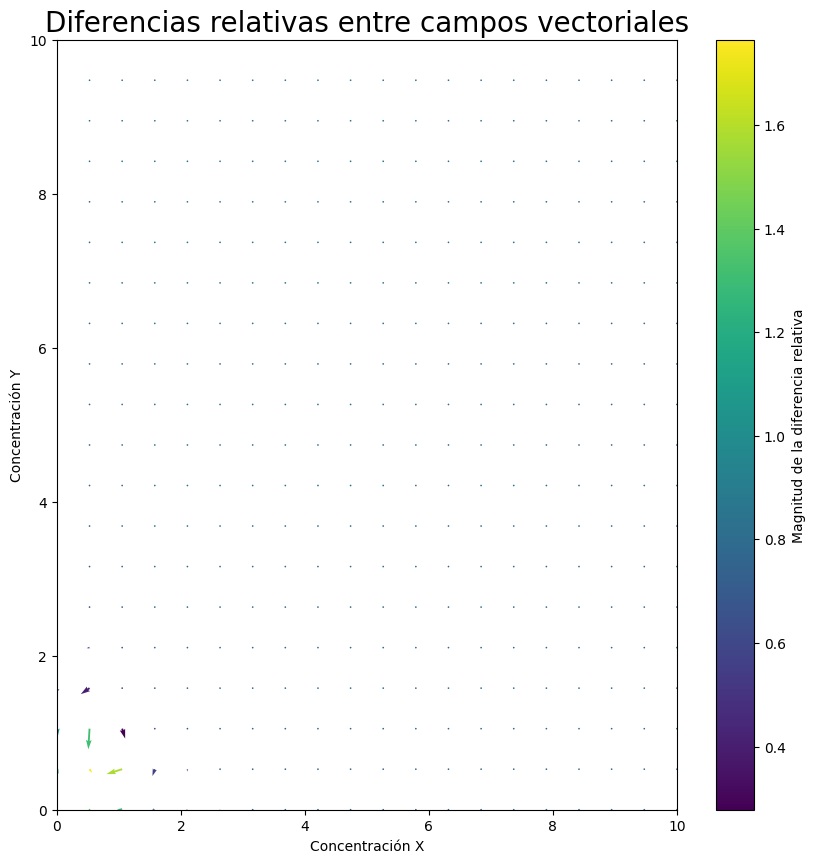

In [74]:
fig, ax = plt.subplots(figsize=(10, 10))

# Calculamos las diferencias
u_diff = u - upred
v_diff = v - vpred

# Aseguramos que ningún vector tenga una magnitud exactamente igual a cero
epsilon = 1e-7

# Calculamos la magnitud del vector original y de la diferencia
M_orig = np.hypot(u1, v1) + epsilon
M_diff = np.hypot(u1pred, v1pred)

# Calculamos la diferencia relativa
M_diff_rel = M_diff / M_orig

#Calcula la magnitud de los vectores
magnitudes = np.sqrt(u_diff**2 + v_diff**2)

# Calcula el rango de las magnitudes
rango = (np.max(magnitudes) - np.min(magnitudes))*30

# Graficamos las diferencias relativas
Q = ax.quiver(Y1, Y2, u_diff, v_diff, M_diff_rel, angles='xy', scale = rango)

ax.set_title('Diferencias relativas entre campos vectoriales', fontsize=20)
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_xlabel('Concentración X')
ax.set_ylabel('Concentración Y')

# Creamos una leyenda para la magnitud de las flechas
cbar = plt.colorbar(Q, ax=ax)
cbar.set_label('Magnitud de la diferencia relativa')

plt.show()

In [75]:
max_index_flattened = M_diff_rel.argmax()
max_coords = np.unravel_index(max_index_flattened, M_diff_rel.shape)
M_orig[max_coords]
print('El valor máximo de error relativo es de:', M_diff_rel.max() )
print('El valor de u1 en el error relativo máximo es:',u1[max_coords])
print('El valor de u1pred en el error relativo máximo es:',u1pred[max_coords])
print('El valor de v1 en el error relativo máximo es:',v1[max_coords])
print('El valor de v1pred en el error relativo máximo es:',v1pred[max_coords])

El valor máximo de error relativo es de: 1.7646045321907669
El valor de u1 en el error relativo máximo es: 3.6522434067815963
El valor de u1pred en el error relativo máximo es: 5.1532604255262155
El valor de v1 en el error relativo máximo es: 2.3556342048179015
El valor de v1pred en el error relativo máximo es: 5.6795762149999
